In [1]:
import pandas as pd
import numpy as np

In [9]:
df=pd.read_csv('diabetes_prediction_dataset.csv')
df.head()

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0


In [11]:
# Label Encoding for 'gender' column
df['gender'] = df['gender'].map({'Male': 0, 'Female': 1})

# Check the result
df.head()


,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,1.0,80.0,0,1,never,25.19,6.6,140,0
1,1.0,54.0,0,0,No Info,27.32,6.6,80,0
2,0.0,28.0,0,0,never,27.32,5.7,158,0
3,1.0,36.0,0,0,current,23.45,5.0,155,0
4,0.0,76.0,1,1,current,20.14,4.8,155,0


In [13]:
# One-Hot Encoding for 'smoking_history' column
df_encoded = pd.get_dummies(df, columns=['smoking_history'], drop_first=True)

# Check the result
df_encoded.head()


,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0,80.0,0,1,25.19,6.6,140,0,False,False,False,True,False
1,1.0,54.0,0,0,27.32,6.6,80,0,False,False,False,False,False
2,0.0,28.0,0,0,27.32,5.7,158,0,False,False,False,True,False
3,1.0,36.0,0,0,23.45,5.0,155,0,True,False,False,False,False
4,0.0,76.0,1,1,20.14,4.8,155,0,True,False,False,False,False


In [23]:
# Drop rows with null values
df_encoded = df_encoded.dropna()

# Check the result
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       99982 non-null  float64
 1   age                          99982 non-null  float64
 2   hypertension                 99982 non-null  int64  
 3   heart_disease                99982 non-null  int64  
 4   bmi                          99982 non-null  float64
 5   HbA1c_level                  99982 non-null  float64
 6   blood_glucose_level          99982 non-null  int64  
 7   diabetes                     99982 non-null  int64  
 8   smoking_history_current      99982 non-null  bool   
 9   smoking_history_ever         99982 non-null  bool   
 10  smoking_history_former       99982 non-null  bool   
 11  smoking_history_never        99982 non-null  bool   
 12  smoking_history_not current  99982 non-null  bool   
dtypes: bool(5), float64(4

In [25]:
X=df_encoded.drop('diabetes',axis=1)
y=df_encoded['diabetes']
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current
0,1.0,80.0,0,1,25.19,6.6,140,False,False,False,True,False
1,1.0,54.0,0,0,27.32,6.6,80,False,False,False,False,False
2,0.0,28.0,0,0,27.32,5.7,158,False,False,False,True,False
3,1.0,36.0,0,0,23.45,5.0,155,True,False,False,False,False
4,0.0,76.0,1,1,20.14,4.8,155,True,False,False,False,False


In [27]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [29]:
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Index: 99982 entries, 0 to 99999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   gender                       99982 non-null  float64
 1   age                          99982 non-null  float64
 2   hypertension                 99982 non-null  int64  
 3   heart_disease                99982 non-null  int64  
 4   bmi                          99982 non-null  float64
 5   HbA1c_level                  99982 non-null  float64
 6   blood_glucose_level          99982 non-null  int64  
 7   diabetes                     99982 non-null  int64  
 8   smoking_history_current      99982 non-null  bool   
 9   smoking_history_ever         99982 non-null  bool   
 10  smoking_history_former       99982 non-null  bool   
 11  smoking_history_never        99982 non-null  bool   
 12  smoking_history_not current  99982 non-null  bool   
dtypes: bool(5), float64(4

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# lets visualize the data
df_encoded.describe()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
count,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000,99982.000000
mean,0.585625,41.888076,0.074863,0.039427,27.320757,5.527529,138.057810,0.085015
std,0.492616,22.517206,0.263172,0.194610,6.636853,1.070665,40.709469,0.278906
min,0.000000,0.080000,0.000000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,0.000000,24.000000,0.000000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,1.000000,43.000000,0.000000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,1.000000,60.000000,0.000000,0.000000,29.580000,6.200000,159.000000,0.000000
max,1.000000,80.000000,1.000000,1.000000,95.690000,9.000000,300.000000,1.000000


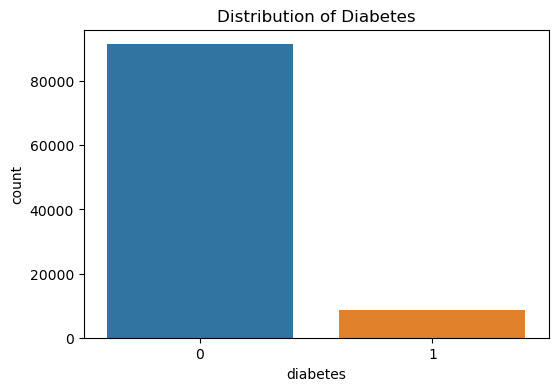

In [35]:
# Distribution of the target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='diabetes', data=df_encoded)
plt.title('Distribution of Diabetes')
plt.show()
# Show the counts of observations in each categorical bin using bars

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


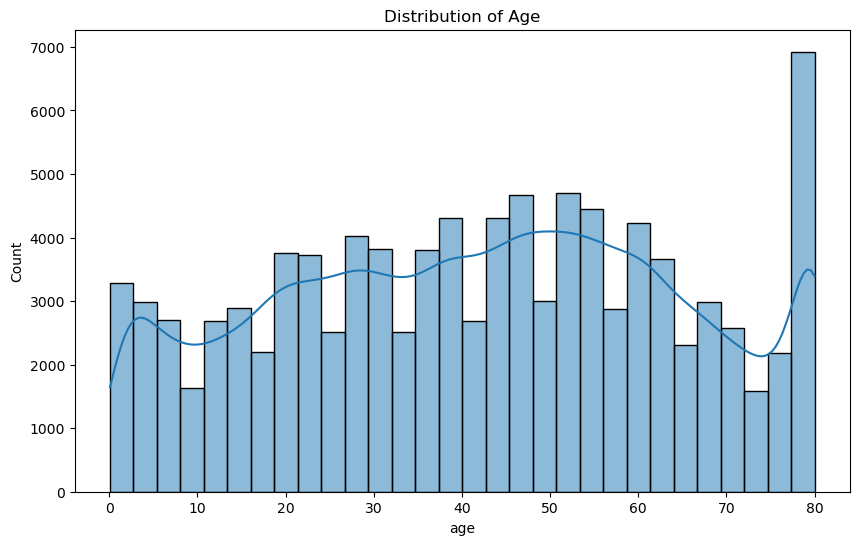

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


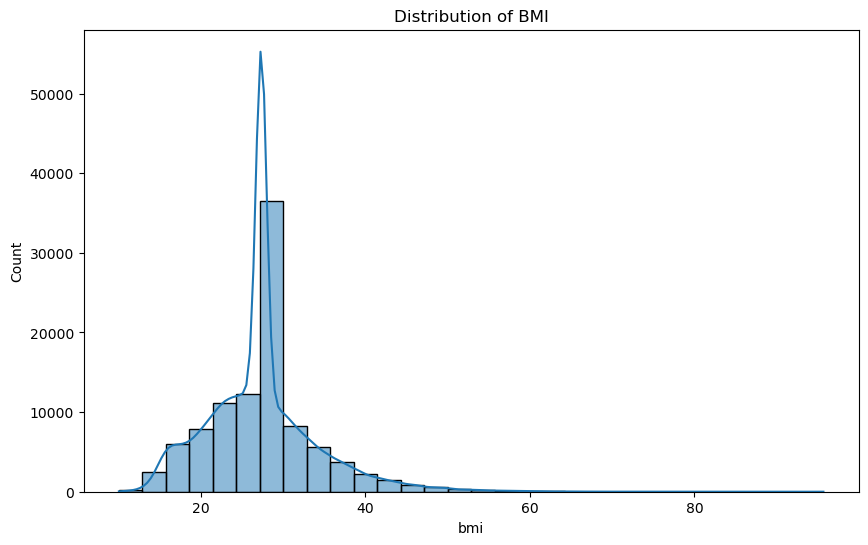

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


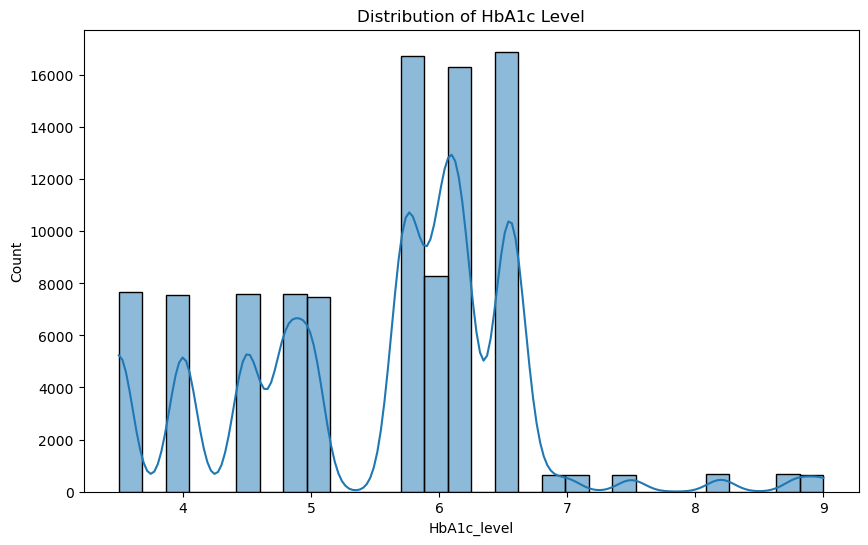

C:\Users\pc\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


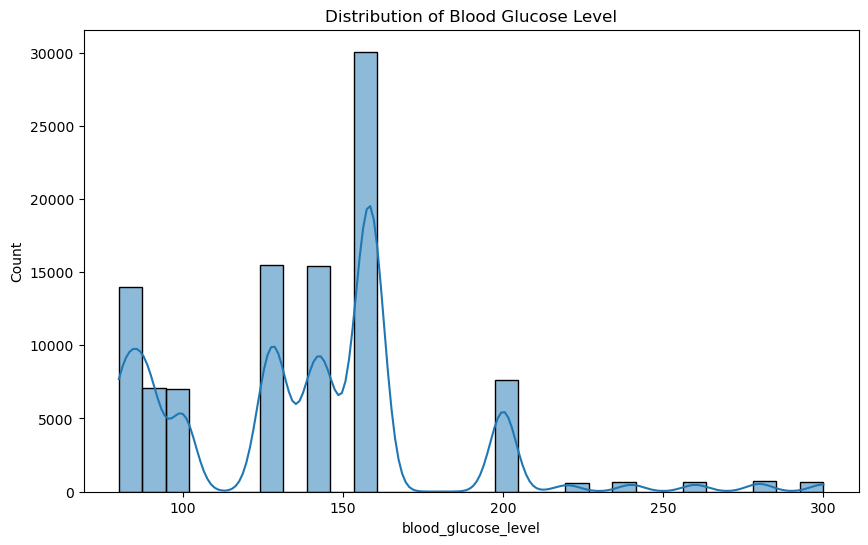

In [37]:
# this dataset has lots of 0's and very less 1's so accuracy might not a good measure of how good my model would be 
# we'll use something like precision 
# Distribution of 'age'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['age'], bins=30, kde=True)
plt.title('Distribution of Age')
plt.show()

# Distribution of 'bmi'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['bmi'], bins=30, kde=True)
plt.title('Distribution of BMI')
plt.show()

# Distribution of 'HbA1c_level'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['HbA1c_level'], bins=30, kde=True)
plt.title('Distribution of HbA1c Level')
plt.show()

# Distribution of 'blood_glucose_level'
plt.figure(figsize=(10, 6))
sns.histplot(df_encoded['blood_glucose_level'], bins=30, kde=True)
plt.title('Distribution of Blood Glucose Level')
plt.show()


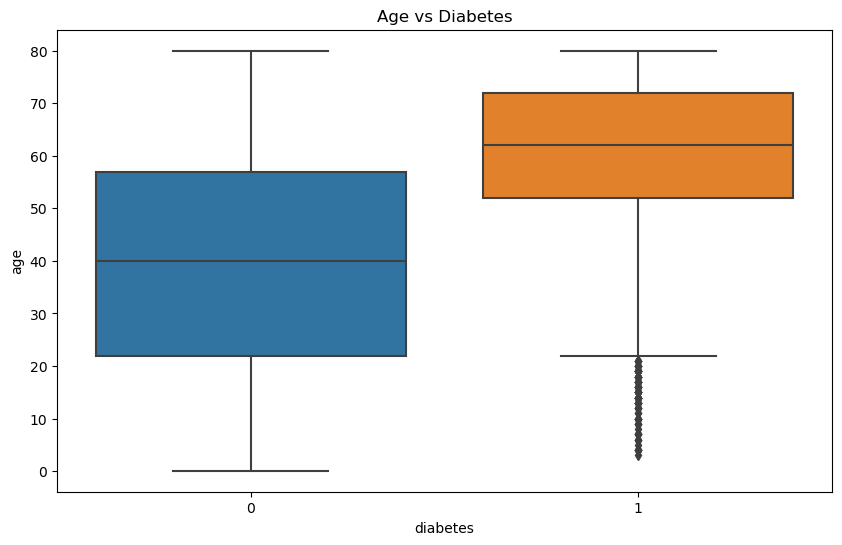

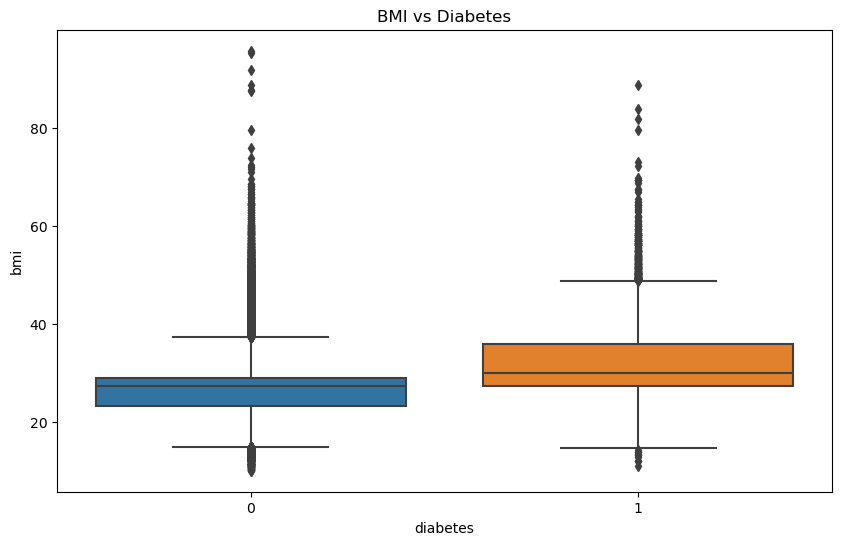

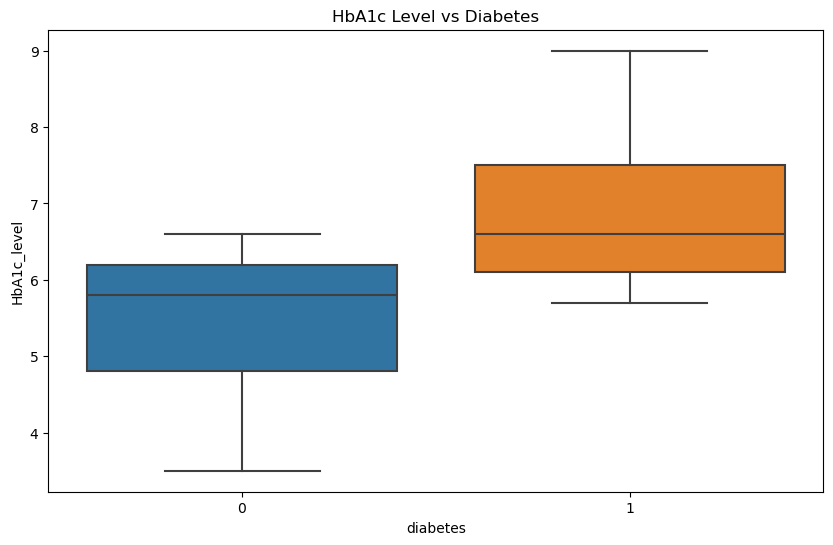

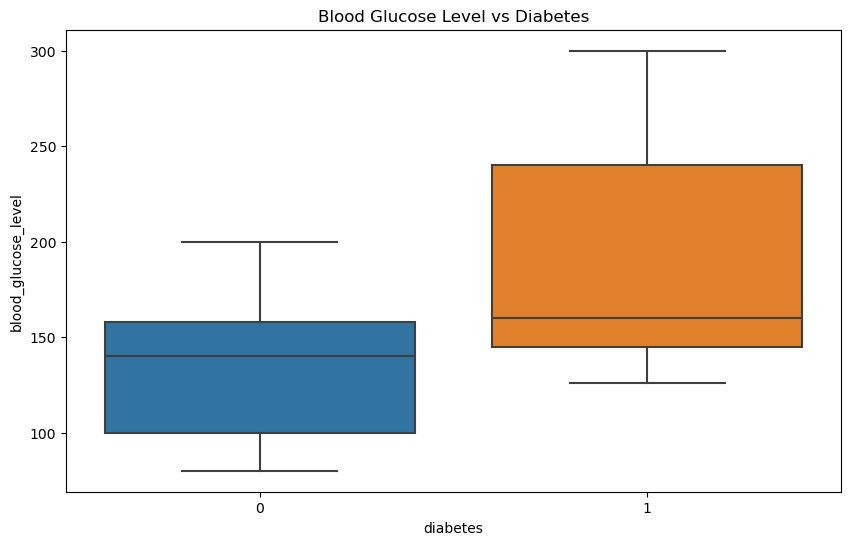

In [39]:
# Age vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='age', data=df_encoded)
plt.title('Age vs Diabetes')
plt.show()

# BMI vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='bmi', data=df_encoded)
plt.title('BMI vs Diabetes')
plt.show()

# HbA1c Level vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='HbA1c_level', data=df_encoded)
plt.title('HbA1c Level vs Diabetes')
plt.show()

# Blood Glucose Level vs Diabetes
plt.figure(figsize=(10, 6))
sns.boxplot(x='diabetes', y='blood_glucose_level', data=df_encoded)
plt.title('Blood Glucose Level vs Diabetes')
plt.show()


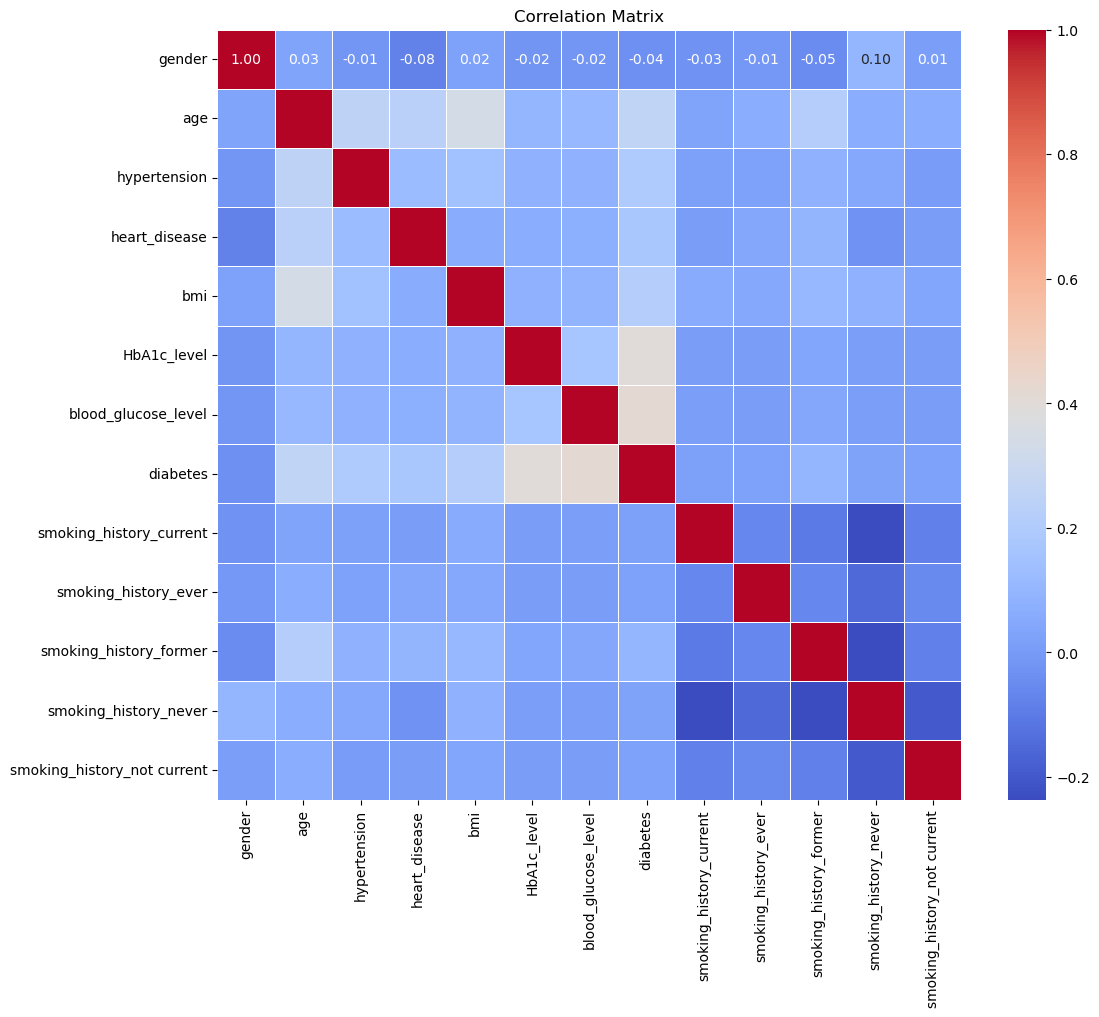

In [41]:
# Compute the correlation matrix
corr_matrix = df_encoded.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()


In [45]:
pip install xgboost


   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/124.9 MB 495.5 kB/s eta 0:04:12
   ---------------------------------------- 0.1/124.9 MB 1.2 MB/s eta 0:01:43
   ---------------------------------------- 0.4/124.9 MB 2.2 MB/s eta 0:00:56
   ---------------------------------------- 0.9/124.9 MB 4.2 MB/s eta 0:00:30
    --------------------------------------- 1.9/124.9 MB 7.7 MB/s eta 0:00:17
   - -------------------------------------- 4.0/124.9 MB 13.5 MB/s eta 0:00:09
   -- ------------------------------------- 8.2/124.9 MB 23.9 MB/s eta 0:00:05
   ---- ----------------------------------- 12.8/124.9 MB 81.8 MB/s eta 0:00:02
   ----- ---------------------------------- 17.2/124.9 MB 93.9 MB/s eta 0:00:02
   ----- ---------------------------------- 17.3/124.9 MB 93.9 MB/s eta 0:00:02
   ----- ---------------------------------- 18.1/124.9 MB 54.4 MB/s 

In [49]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Splitting the data
X = df_encoded.drop(columns='diabetes')
y = df_encoded['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scaling the features (if necessary)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)



In [51]:
import xgboost as xgb

# Initialize and train the XGBoost model
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [53]:
from sklearn.metrics import classification_report, confusion_matrix

# Make predictions
y_pred_xgb = xgb_model.predict(X_test_scaled)

# Evaluation metrics
print("XGBoost Classification Report:\n", classification_report(y_test, y_pred_xgb))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb))


XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.96      0.70      0.81      1775

    accuracy                           0.97     19997
   macro avg       0.97      0.85      0.90     19997
weighted avg       0.97      0.97      0.97     19997

Confusion Matrix:
 [[18176    46]
 [  540  1235]]


<Figure size 1200x800 with 0 Axes>

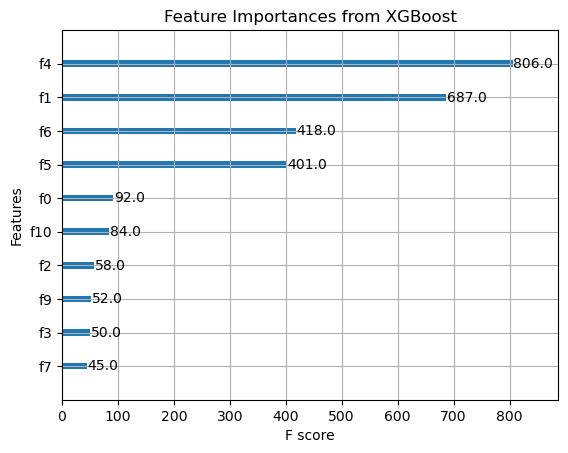

In [55]:
import matplotlib.pyplot as plt
from xgboost import plot_importance

# Plot feature importance
plt.figure(figsize=(12, 8))
plot_importance(xgb_model, importance_type='weight', max_num_features=10)
plt.title('Feature Importances from XGBoost')
plt.show()


In [59]:
xgb_model = xgb.XGBClassifier(eval_metric='mlogloss', scale_pos_weight=10, random_state=42)
xgb_model.fit(X_train_scaled, y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [61]:
from imblearn.over_sampling import SMOTE

# Apply SMOTE
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train_scaled, y_train)

# Train model on SMOTE data
xgb_model_smote = xgb.XGBClassifier(eval_metric='mlogloss', random_state=42)
xgb_model_smote.fit(X_train_smote, y_train_smote)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='mlogloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=42, ...)

In [63]:
y_pred_xgb_smote = xgb_model_smote.predict(X_test_scaled)
print("XGBoost with SMOTE Classification Report:\n", classification_report(y_test, y_pred_xgb_smote))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_xgb_smote))


XGBoost with SMOTE Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98     18222
           1       0.90      0.71      0.80      1775

    accuracy                           0.97     19997
   macro avg       0.94      0.85      0.89     19997
weighted avg       0.97      0.97      0.97     19997

Confusion Matrix:
 [[18089   133]
 [  510  1265]]


In [65]:
from sklearn.model_selection import GridSearchCV

# Define parameter grid
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1]
}

# Initialize and train GridSearch
grid_search = GridSearchCV(xgb.XGBClassifier(eval_metric='mlogloss', random_state=42), param_grid, scoring='f1', cv=3)
grid_search.fit(X_train_scaled, y_train)

# Best parameters and model
print("Best Parameters:", grid_search.best_params_)
xgb_best_model = grid_search.best_estimator_

# Evaluate the best model
y_pred_best = xgb_best_model.predict(X_test_scaled)
print("Best XGBoost Classification Report:\n", classification_report(y_test, y_pred_best))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_best))


Best Parameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}
Best XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.97      1.00      0.98     18222
           1       0.99      0.68      0.81      1775

    accuracy                           0.97     19997
   macro avg       0.98      0.84      0.90     19997
weighted avg       0.97      0.97      0.97     19997

Confusion Matrix:
 [[18212    10]
 [  560  1215]]


In [67]:
import joblib
import xgboost as xgb

# Assuming you have your model trained and named `xgb_best_model`
joblib.dump(xgb_best_model, 'xgb_best_model.pkl')


['xgb_best_model.pkl']